## A notebook for the preprocessing & parts of the statistical analysis of the GEQ data 


- cleaning of the data files exported from qualtrics 
- scoring for the 2 modules of the GEQ (Core and Post-Game Module) 
- check difference in scores between conditions for normality using QQ plots and Shapiro-Wilk 

Ref. GEQ: IJsselsteijn, W. A., De Kort, Y. A., & Poels, K. (2013). The game experience questionnaire. 

In [41]:
import pandas as pd
from scipy.stats import shapiro 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functools import reduce
import os

### Read in and preprocess Post Questionnaire 1 

In [ ]:
# import q1 

q1 = pd.read_excel("Questionnaire Data/PostQ1.xlsx")

# drop unnecessary columns 
q1 = q1.iloc[1:, 16:].reset_index(drop=True)

## rename columns 
# Create the new list of column names
# first condition & ID
new_columns = ['condition', 'ID']

# next 33 columns are "c1", "c2", ..., "c33"
new_columns += [f'c{i}' for i in range(1, 34)]

# next 17 columns are "p1", "p2", ..., "p17"
new_columns += [f'p{i}' for i in range(1, 18)]

# assign new column names
q1.columns = new_columns
# remove newlines and strip spaces for matching later on 
q1['ID'] = q1['ID'].astype(str).str.replace('\n', '', regex=False).str.strip()
# remove rows with missing values 
q1 = q1.dropna().reset_index(drop=True)
print(q1)



   condition      ID c1 c2 c3 c4 c5 c6 c7 c8  ... p8 p9 p10 p11 p12 p13 p14  \
0          g  28CO38  4  3  4  4  4  4  1  3  ...  3  1   1   1   1   1   1   
1          s  29MA29  3  4  4  5  4  5  1  2  ...  4  2   1   1   3   2   1   
2          g  19RA95  4  4  4  4  4  4  1  3  ...  3  1   1   1   3   1   1   
3          s  08MA21  5  4  1  4  5  4  1  3  ...  5  1   2   2   4   2   1   
4          g  17HE69  4  4  4  5  4  4  1  3  ...  3  1   1   2   4   2   3   
5          s   2BR68  3  3  4  3  2  3  2  3  ...  3  3   2   3   2   2   1   
6          g  02JO85  5  5  5  5  5  5  1  2  ...  5  1   1   1   5   1   1   
7          s  17BE17  2  4  1  4  4  2  1  3  ...  3  1   1   1   1   1   1   
8          g  09HA13  4  5  5  5  5  5  1  2  ...  5  1   1   1   5   1   1   
9          s  21EL67  5  5  2  5  4  5  1  2  ...  5  1   1   1   5   1   1   
10         g  27JA04  4  4  5  5  5  3  1  2  ...  4  1   1   1   3   1   1   
11         s  15JO96  3  3  1  2  4  3  1  1  ...  3

### Read in and preprocess Post questionnaire 2

In [ ]:
# import q2

q2 = pd.read_excel("Questionnaire Data/PostQ2.xlsx")

# drop unnecessary columns 
q2 = q2.iloc[1:, 16:].reset_index(drop=True)

## rename columns 
# Create the new list of column names
# first condition & ID
new_columns = ['condition', 'ID']

# next 33 columns are "c1", "c2", ..., "c33"
new_columns += [f'c{i}' for i in range(1, 34)]

# next 17 columns are "p1", "p2", ..., "p17"
new_columns += [f'p{i}' for i in range(1, 18)]

# last two columns are "preference" and "justification"
new_columns += ['preference', 'justification']

# assign new column names
q2.columns = new_columns
# remove newlines and strip spaces for matching later on 
q2['ID'] = q2['ID'].astype(str).str.replace('\n', '', regex=False).str.strip()
# remove rows with missing values 
q2 = q2.dropna().reset_index(drop=True)

# make sure justification has no new lines or trailing spaces messing up merging 
q2['justification'] = q2['justification'].astype(str).str.replace('\n', '', regex=False).str.strip()

print(q2)

   condition      ID c1 c2 c3 c4 c5 c6 c7 c8  ... p10 p11 p12 p13 p14 p15 p16  \
0          s  28CO38  4  3  1  3  4  4  1  4  ...   1   1   1   1   1   1   1   
1          g  29MA29  5  4  4  4  4  5  1  3  ...   1   1   3   2   1   1   3   
2          s  19RA95  4  4  2  3  2  4  1  2  ...   1   1   2   1   1   1   4   
3          g  08MA21  5  5  4  4  4  4  1  3  ...   3   1   4   3   1   1   4   
4          s  17HE69  3  3  1  3  3  4  1  3  ...   2   3   2   1   1   2   3   
5          g   2BR68  3  2  3  3  3  3  2  2  ...   3   2   2   2   1   1   3   
6          s  02JO85  5  5  1  5  5  5  1  2  ...   1   1   5   1   1   1   5   
7          g  17BE17  3  4  2  2  3  3  1  2  ...   1   1   3   1   1   1   4   
8          s  09HA13  5  5  4  4  5  4  1  2  ...   1   1   4   1   1   1   5   
9          g  21EL67  4  4  5  5  4  5  1  2  ...   2   1   3   1   1   1   3   
10         s  27JA04  4  4  1  3  5  4  1  2  ...   1   1   2   1   1   1   2   
11         g  15JO96  4  4  

### Merge the two dataframes 

In [44]:
# put in one dataframe 
df_concat = pd.concat([q1, q2]).reset_index(drop=True)

# columns to be strings
string_cols = ['condition', 'ID', 'justification']
df_concat[string_cols] = df_concat[string_cols].astype(str)

# apply int to all other columns (preference NaNs = 999)
df_concat = df_concat.apply(lambda col: col if col.name in string_cols else col.fillna(999).astype(int))



print(df_concat)

   condition      ID  c1  c2  c3  c4  c5  c6  c7  c8  ...  p10  p11  p12  p13  \
0          g  28CO38   4   3   4   4   4   4   1   3  ...    1    1    1    1   
1          s  29MA29   3   4   4   5   4   5   1   2  ...    1    1    3    2   
2          g  19RA95   4   4   4   4   4   4   1   3  ...    1    1    3    1   
3          s  08MA21   5   4   1   4   5   4   1   3  ...    2    2    4    2   
4          g  17HE69   4   4   4   5   4   4   1   3  ...    1    2    4    2   
5          s   2BR68   3   3   4   3   2   3   2   3  ...    2    3    2    2   
6          g  02JO85   5   5   5   5   5   5   1   2  ...    1    1    5    1   
7          s  17BE17   2   4   1   4   4   2   1   3  ...    1    1    1    1   
8          g  09HA13   4   5   5   5   5   5   1   2  ...    1    1    5    1   
9          s  21EL67   5   5   2   5   4   5   1   2  ...    1    1    5    1   
10         g  27JA04   4   4   5   5   5   3   1   2  ...    1    1    3    1   
11         s  15JO96   3   3

In [45]:
# export to new csv
df_concat.to_csv('questionnaire_clean_merge.csv', index=False)

### Scoring: Core components

Get the average values for all core-module components per participant per condition 

In [46]:
## scoring combinations for all components 

# core module 

"""
Scoring guidelines GEQ Core Module
The Core GEQ Module consists of seven components; the items for each are listed below.
Component scores are computed as the average value of its items.
Competence: Items 2, 10, 15, 17, and 21.
Sensory and Imaginative Immersion: Items 3, 12, 18, 19, 27, and 30.
Flow: Items 5, 13, 25, 28, and 31.
Tension/Annoyance: Items 22, 24, and 29.
Challenge: Items 11, 23, 26, 32, and 33.
Negative affect: Items 7, 8, 9, and 16.
Positive affect: Items 1, 4, 6, 14, and 20.
"""

competence = ['c2', 'c10', 'c15', 'c17', 'c21']
immersion = ['c3', 'c12', 'c18', 'c19', 'c27', 'c30']
flow = ['c5', 'c13', 'c25', 'c28', 'c31']
tension = ['c22', 'c24', 'c29']
challenge = ['c11', 'c23', 'c26', 'c32', 'c33']
neg_aff = ['c7', 'c8', 'c9', 'c16']
pos_aff = ['c1', 'c4', 'c6', 'c14', 'c20']


# post game module 

"""
Scoring guidelines GEQ Post-game Module
The post-game Module consists of four components; the items for each are listed below.
Component scores are computed as the average value of its items.
Positive Experience: Items 1, 5, 7, 8, 12, 16.
Negative experience: Items 2, 4, 6, 11, 14, 15.
Tiredness: Items 10, 13.
Returning to Reality: Items 3, 9, and 17.
"""

pos_exp = ['p1', 'p5', 'p7', 'p8', 'p12', 'p16']
neg_exp = ['p2', 'p4', 'p6', 'p11', 'p14', 'p15']
tiredness = ['p10', 'p13']
returning = ['p3', 'p9', 'p17']


In [47]:
# competence 
score_competence = df_concat.groupby(['ID', 'condition'])[competence].mean().mean(axis=1).reset_index(name='Competence')
print(score_competence)

        ID condition  Competence
0   02JO85         g         5.0
1   02JO85         s         5.0
2   07az26         g         4.4
3   07az26         s         4.4
4   08MA21         g         4.2
5   08MA21         s         4.2
6   09HA13         g         5.0
7   09HA13         s         5.0
8   10PE77         g         4.4
9   10PE77         s         4.0
10  11LK66         g         3.8
11  11LK66         s         4.4
12  15JO96         g         3.6
13  15JO96         s         3.2
14  17BE17         g         3.0
15  17BE17         s         4.4
16  17HE69         g         3.8
17  17HE69         s         3.8
18  19RA95         g         4.0
19  19RA95         s         4.0
20  21EL67         g         4.0
21  21EL67         s         5.0
22  27JA04         g         4.2
23  27JA04         s         4.0
24  28CO38         g         3.8
25  28CO38         s         2.8
26  29MA29         g         4.0
27  29MA29         s         3.8
28   2BR68         g         2.6
29   2BR68

In [48]:
# immersion 
score_immersion = df_concat.groupby(['ID', 'condition'])[immersion].mean().mean(axis=1).reset_index(name='Immersion')
print(score_immersion)

        ID condition  Immersion
0   02JO85         g   3.000000
1   02JO85         s   2.333333
2   07az26         g   4.666667
3   07az26         s   2.166667
4   08MA21         g   3.500000
5   08MA21         s   2.666667
6   09HA13         g   4.666667
7   09HA13         s   3.666667
8   10PE77         g   3.166667
9   10PE77         s   3.000000
10  11LK66         g   1.166667
11  11LK66         s   1.333333
12  15JO96         g   3.000000
13  15JO96         s   1.666667
14  17BE17         g   2.166667
15  17BE17         s   1.666667
16  17HE69         g   2.666667
17  17HE69         s   1.666667
18  19RA95         g   3.666667
19  19RA95         s   2.166667
20  21EL67         g   4.000000
21  21EL67         s   3.000000
22  27JA04         g   3.666667
23  27JA04         s   2.500000
24  28CO38         g   3.333333
25  28CO38         s   1.000000
26  29MA29         g   4.500000
27  29MA29         s   4.333333
28   2BR68         g   2.666667
29   2BR68         s   2.333333
30   2MA

In [49]:
# flow 
score_flow = df_concat.groupby(['ID', 'condition'])[flow].mean().mean(axis=1).reset_index(name='Flow')
print(score_flow)

        ID condition  Flow
0   02JO85         g   4.2
1   02JO85         s   3.4
2   07az26         g   3.8
3   07az26         s   2.6
4   08MA21         g   3.2
5   08MA21         s   4.2
6   09HA13         g   5.0
7   09HA13         s   4.6
8   10PE77         g   3.8
9   10PE77         s   3.6
10  11LK66         g   2.6
11  11LK66         s   2.8
12  15JO96         g   2.2
13  15JO96         s   2.6
14  17BE17         g   1.6
15  17BE17         s   2.4
16  17HE69         g   4.0
17  17HE69         s   3.4
18  19RA95         g   2.6
19  19RA95         s   2.6
20  21EL67         g   2.6
21  21EL67         s   2.6
22  27JA04         g   3.0
23  27JA04         s   3.0
24  28CO38         g   2.6
25  28CO38         s   1.8
26  29MA29         g   3.2
27  29MA29         s   3.4
28   2BR68         g   2.4
29   2BR68         s   1.6
30   2MA07         g   4.0
31   2MA07         s   3.4


In [50]:
#tension
score_tension = df_concat.groupby(['ID', 'condition'])[tension].mean().mean(axis=1).reset_index(name='Tension')
print(score_tension)

        ID condition   Tension
0   02JO85         g  1.000000
1   02JO85         s  1.000000
2   07az26         g  1.000000
3   07az26         s  2.333333
4   08MA21         g  1.666667
5   08MA21         s  1.000000
6   09HA13         g  1.000000
7   09HA13         s  1.000000
8   10PE77         g  1.000000
9   10PE77         s  1.000000
10  11LK66         g  1.000000
11  11LK66         s  1.000000
12  15JO96         g  1.000000
13  15JO96         s  1.000000
14  17BE17         g  1.666667
15  17BE17         s  1.000000
16  17HE69         g  2.000000
17  17HE69         s  2.000000
18  19RA95         g  1.666667
19  19RA95         s  1.666667
20  21EL67         g  1.000000
21  21EL67         s  1.000000
22  27JA04         g  1.000000
23  27JA04         s  1.000000
24  28CO38         g  1.000000
25  28CO38         s  1.000000
26  29MA29         g  1.000000
27  29MA29         s  1.333333
28   2BR68         g  2.000000
29   2BR68         s  1.666667
30   2MA07         g  1.333333
31   2MA

In [51]:
#challenge 
score_challenge = df_concat.groupby(['ID', 'condition'])[challenge].mean().mean(axis=1).reset_index(name='Challenge')
print(score_challenge)

        ID condition  Challenge
0   02JO85         g        1.8
1   02JO85         s        1.8
2   07az26         g        3.2
3   07az26         s        1.8
4   08MA21         g        3.0
5   08MA21         s        2.4
6   09HA13         g        2.2
7   09HA13         s        1.0
8   10PE77         g        1.2
9   10PE77         s        2.0
10  11LK66         g        1.0
11  11LK66         s        1.0
12  15JO96         g        1.4
13  15JO96         s        1.2
14  17BE17         g        1.8
15  17BE17         s        1.0
16  17HE69         g        3.0
17  17HE69         s        2.6
18  19RA95         g        1.4
19  19RA95         s        1.2
20  21EL67         g        1.8
21  21EL67         s        1.2
22  27JA04         g        2.6
23  27JA04         s        2.2
24  28CO38         g        1.4
25  28CO38         s        2.0
26  29MA29         g        2.8
27  29MA29         s        3.0
28   2BR68         g        2.0
29   2BR68         s        1.4
30   2MA

In [52]:
#negative affect
score_neg_aff = df_concat.groupby(['ID', 'condition'])[neg_aff].mean().mean(axis=1).reset_index(name='NegAff')
print(score_neg_aff)

        ID condition  NegAff
0   02JO85         g    1.25
1   02JO85         s    2.00
2   07az26         g    1.75
3   07az26         s    3.00
4   08MA21         g    2.00
5   08MA21         s    1.75
6   09HA13         g    1.25
7   09HA13         s    1.25
8   10PE77         g    1.50
9   10PE77         s    2.00
10  11LK66         g    1.25
11  11LK66         s    1.25
12  15JO96         g    1.25
13  15JO96         s    1.50
14  17BE17         g    1.75
15  17BE17         s    2.00
16  17HE69         g    1.75
17  17HE69         s    1.75
18  19RA95         g    1.50
19  19RA95         s    1.75
20  21EL67         g    1.25
21  21EL67         s    1.25
22  27JA04         g    1.75
23  27JA04         s    1.75
24  28CO38         g    1.50
25  28CO38         s    2.75
26  29MA29         g    2.00
27  29MA29         s    1.75
28   2BR68         g    2.50
29   2BR68         s    2.25
30   2MA07         g    2.25
31   2MA07         s    2.50


In [53]:
#positive affect 
score_pos_aff = df_concat.groupby(['ID', 'condition'])[pos_aff].mean().mean(axis=1).reset_index(name='PosAff')
print(score_pos_aff)

        ID condition  PosAff
0   02JO85         g     5.0
1   02JO85         s     5.0
2   07az26         g     5.0
3   07az26         s     3.0
4   08MA21         g     4.2
5   08MA21         s     4.2
6   09HA13         g     4.8
7   09HA13         s     4.6
8   10PE77         g     4.0
9   10PE77         s     3.4
10  11LK66         g     2.2
11  11LK66         s     3.0
12  15JO96         g     4.0
13  15JO96         s     2.6
14  17BE17         g     3.0
15  17BE17         s     2.6
16  17HE69         g     4.0
17  17HE69         s     3.2
18  19RA95         g     4.0
19  19RA95         s     3.8
20  21EL67         g     4.8
21  21EL67         s     5.0
22  27JA04         g     3.8
23  27JA04         s     3.6
24  28CO38         g     4.0
25  28CO38         s     3.6
26  29MA29         g     4.8
27  29MA29         s     4.4
28   2BR68         g     2.8
29   2BR68         s     3.0
30   2MA07         g     3.4
31   2MA07         s     3.0


In [54]:
# make one dataframe for all core questionnaire components 
core_comps = [score_competence, score_immersion, score_flow, score_tension, score_challenge, score_neg_aff, score_pos_aff]

# merge all components on ['ID', 'condition']
core_combined = reduce(lambda left, right: pd.merge(left, right, on=['ID', 'condition'], how='outer'), core_comps)
core_combined.to_csv('core_combined.csv', index=False)
print(core_combined)


        ID condition  Competence  Immersion  Flow   Tension  Challenge  \
0   02JO85         g         5.0   3.000000   4.2  1.000000        1.8   
1   02JO85         s         5.0   2.333333   3.4  1.000000        1.8   
2   07az26         g         4.4   4.666667   3.8  1.000000        3.2   
3   07az26         s         4.4   2.166667   2.6  2.333333        1.8   
4   08MA21         g         4.2   3.500000   3.2  1.666667        3.0   
5   08MA21         s         4.2   2.666667   4.2  1.000000        2.4   
6   09HA13         g         5.0   4.666667   5.0  1.000000        2.2   
7   09HA13         s         5.0   3.666667   4.6  1.000000        1.0   
8   10PE77         g         4.4   3.166667   3.8  1.000000        1.2   
9   10PE77         s         4.0   3.000000   3.6  1.000000        2.0   
10  11LK66         g         3.8   1.166667   2.6  1.000000        1.0   
11  11LK66         s         4.4   1.333333   2.8  1.000000        1.0   
12  15JO96         g         3.6   3.0

#### Grouped boxplots for core module components

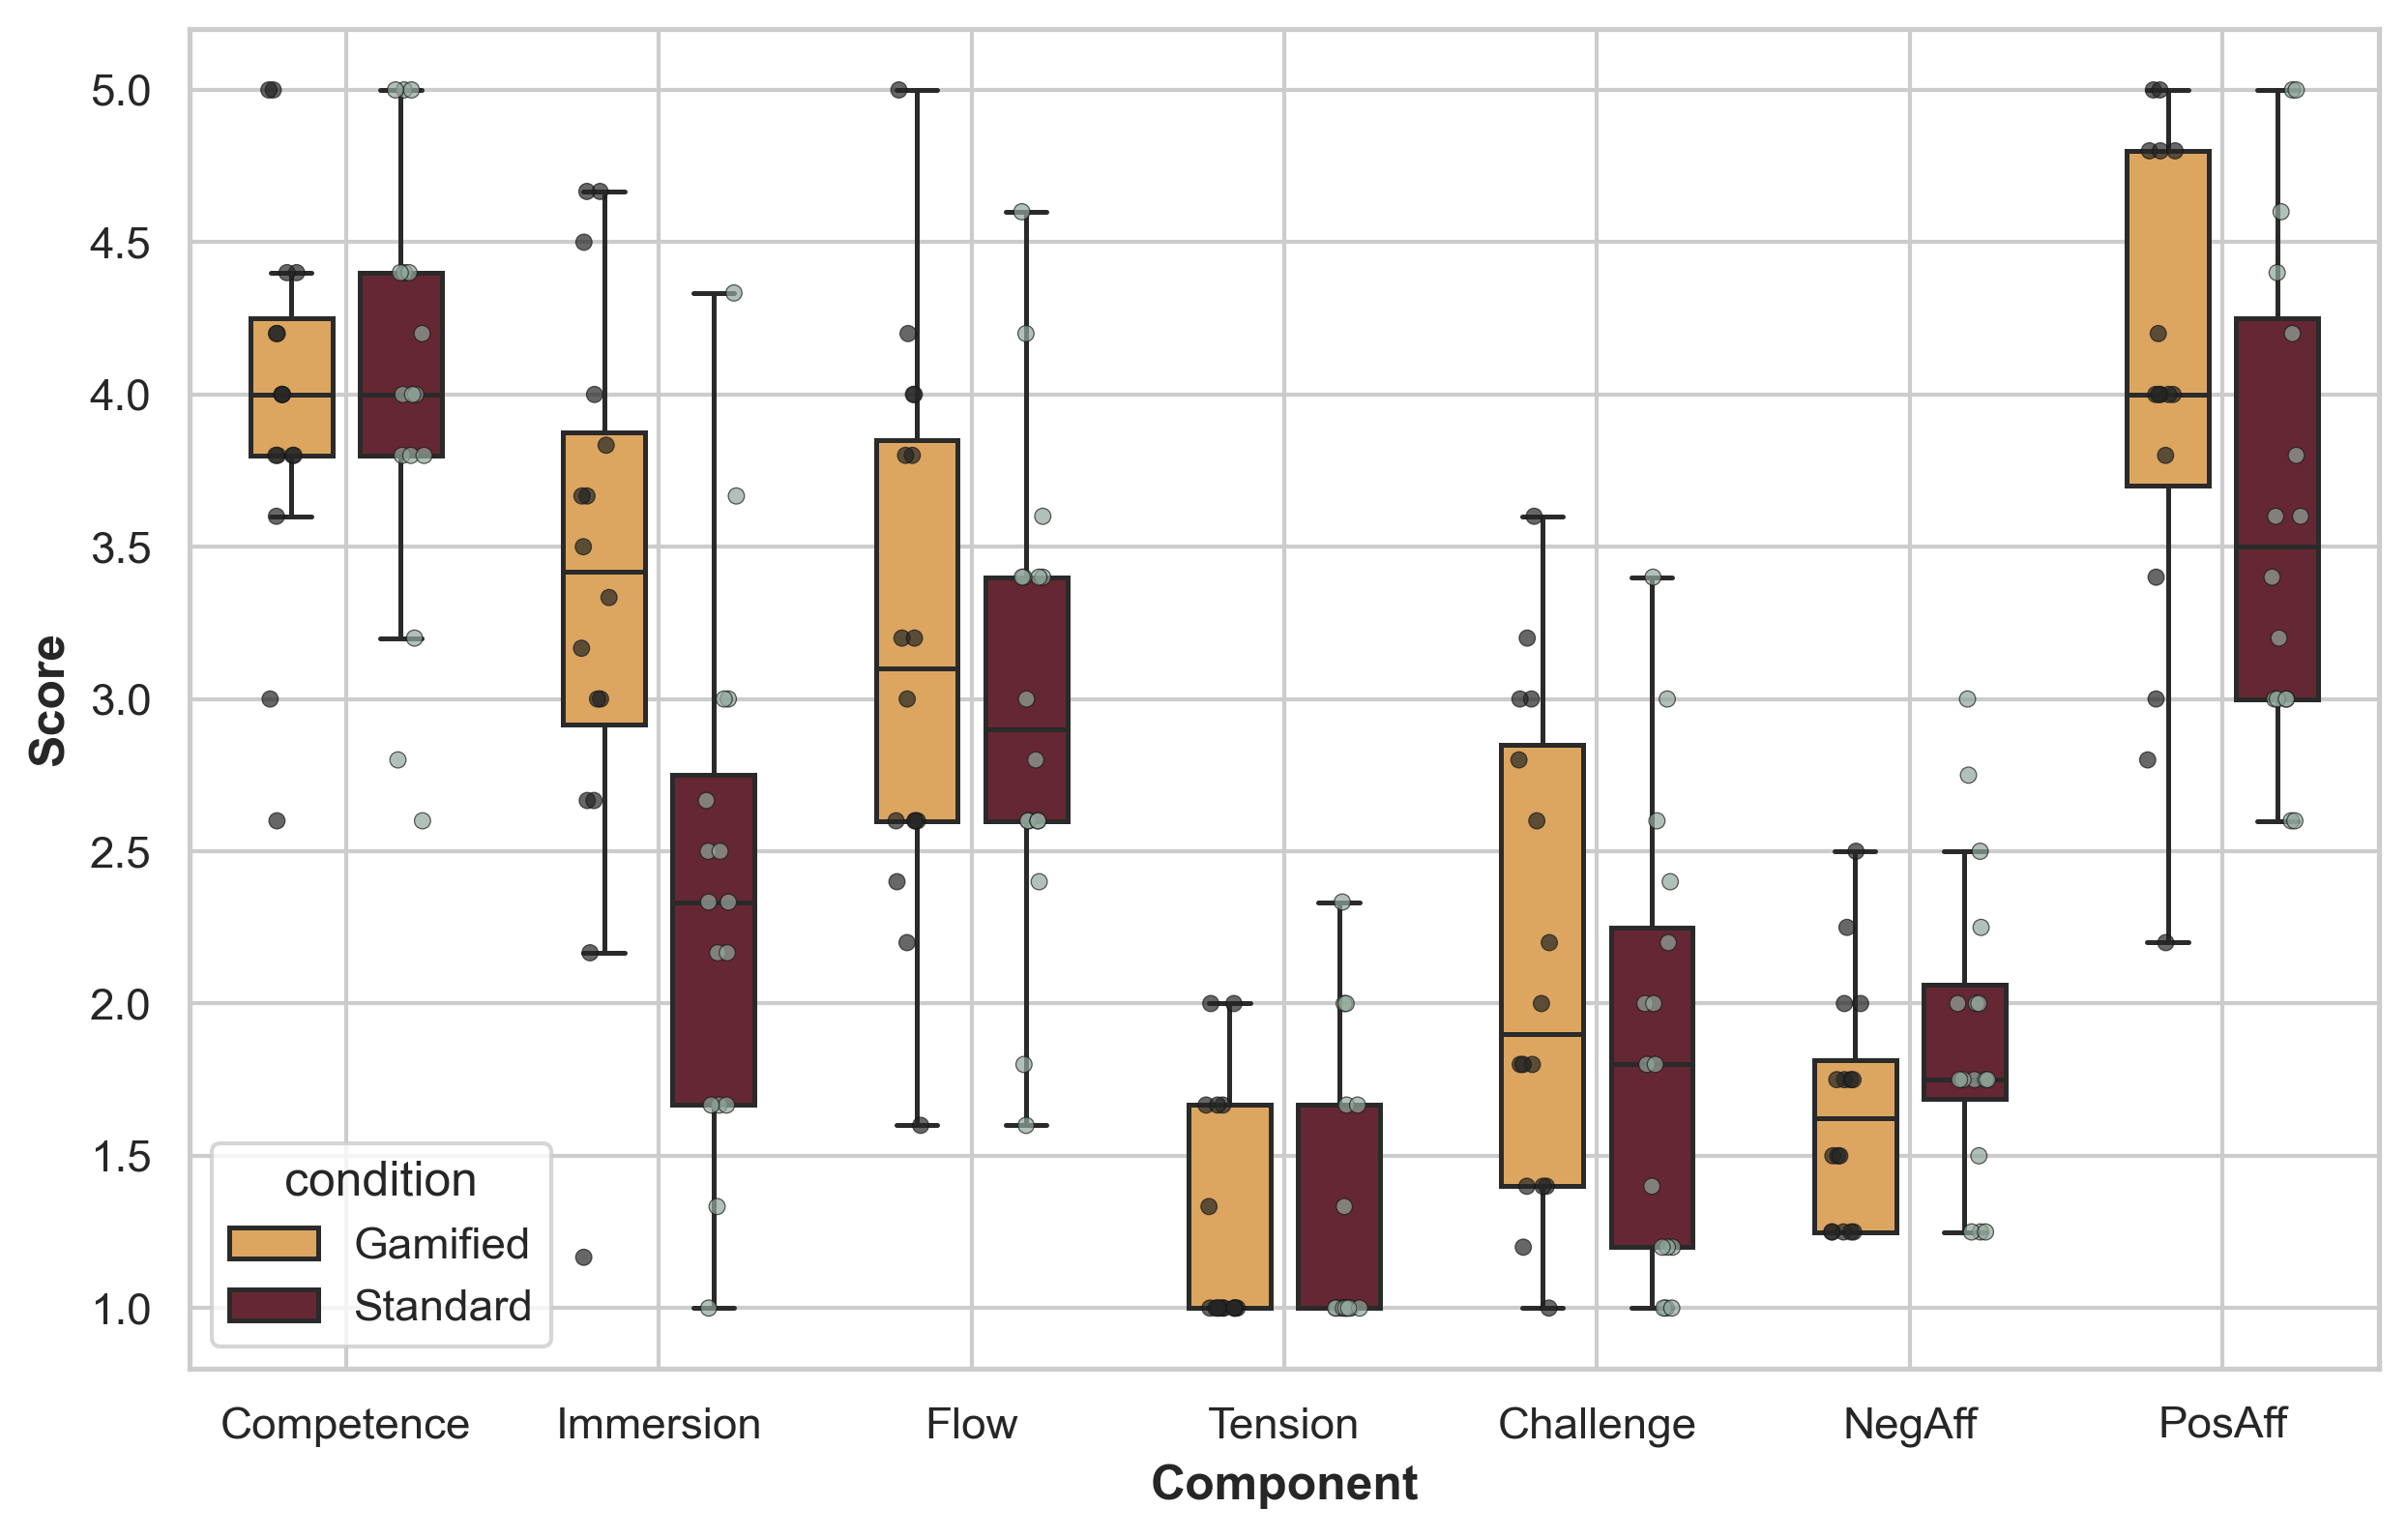

In [68]:

# Reshape the data for grouped plotting
melted_core_df = core_combined.melt(
    id_vars=["ID", "condition"],
    value_vars=["Competence", "Immersion", "Flow", "Tension", "Challenge", "NegAff", "PosAff"],
    var_name="Scale",
    value_name="Score"
)

# Map condition codes to labels
melted_core_df["condition"] = melted_core_df["condition"].map({"g": "Gamified", "s": "Standard"})



# Set theme
sns.set_theme(style="whitegrid")

# Define custom colors
palette = {
    "Gamified": "#F1A84C",  
    "Standard": "#6F1D2D"   
}

# Initialize the plot
plt.figure(figsize=(9, 6), dpi=300)

# Draw grouped boxplot
sns.boxplot(
    x='Scale',
    y='Score',
    hue='condition',
    data=melted_core_df,
    palette=palette,
    width=0.7,
    fliersize=0,
    linewidth=1.2, 
    gap=0.25
)

# Overlay individual datapoints
sns.stripplot(
    x='Scale',
    y='Score',
    hue='condition',
    data=melted_core_df,
    palette='dark:#91A79C',
    dodge=True,
    jitter=True,
    size=4,
    alpha=0.7,
    linewidth=0.3,
    legend=False
)


# Customize labels and layout
plt.rcParams.update({'font.size': 30})
#plt.title('Core Module Answers', fontsize=18, fontweight='bold')
plt.xlabel('Component', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()




#### Calculate difference scores core-module 

In [56]:
# pivot data so that "condition" becomes columns
pivoted = core_combined.pivot(index='ID', columns='condition')
#print(pivoted)

# subtract gamified - standard
diff_core = pivoted.xs('g', axis=1, level=1) - pivoted.xs('s', axis=1, level=1)

# reset index 
diff_core = diff_core.reset_index()
print(diff_core)


        ID  Competence  Immersion  Flow   Tension  Challenge  NegAff  PosAff
0   02JO85         0.0   0.666667   0.8  0.000000        0.0   -0.75     0.0
1   07az26         0.0   2.500000   1.2 -1.333333        1.4   -1.25     2.0
2   08MA21         0.0   0.833333  -1.0  0.666667        0.6    0.25     0.0
3   09HA13         0.0   1.000000   0.4  0.000000        1.2    0.00     0.2
4   10PE77         0.4   0.166667   0.2  0.000000       -0.8   -0.50     0.6
5   11LK66        -0.6  -0.166667  -0.2  0.000000        0.0    0.00    -0.8
6   15JO96         0.4   1.333333  -0.4  0.000000        0.2   -0.25     1.4
7   17BE17        -1.4   0.500000  -0.8  0.666667        0.8   -0.25     0.4
8   17HE69         0.0   1.000000   0.6  0.000000        0.4    0.00     0.8
9   19RA95         0.0   1.500000   0.0  0.000000        0.2   -0.25     0.2
10  21EL67        -1.0   1.000000   0.0  0.000000        0.6    0.00    -0.2
11  27JA04         0.2   1.166667   0.0  0.000000        0.4    0.00     0.2

### Look at distribution for all components' difference scores
- graphical using qq plot (+ histogram & box plot)
- analytical test of normality using Shapiro-Wilk

In [57]:
# Create output folder if it doesn't exist
output_folder = "Component_Distributions"
os.makedirs(output_folder, exist_ok=True)

# drop ID column for this 
core = diff_core.iloc[:, 1:]

# Define customized colors
hist_color = "#91A79C"
box_color = "#F1A84C"
line_color = "#6F1D2D"
ci_color = "#F7D175"

# Loop over each column in your difference DataFrame
for col in core.columns:

    diff_values = core[col]

    
    # Shapiro-Wilk Test to check normality assumption 
    shapiro_stat, shapiro_p = shapiro(diff_values)
    print(f"Shapiro-Wilk Test:\nStatistic = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}")
    if shapiro_p > 0.05:
        print(f"Data for {col} appears to be normally distributed (H0 cannot be rejected)")
    else:
        print(f"Data for {col} does not appear to be normally distributed (reject H0)")


    mu, std = diff_values.mean(), diff_values.std()

    # 1. Histogram with normal distribution overlay
    plt.figure(figsize=(8, 6))
    sns.histplot(diff_values, kde=False, stat="density", bins=10, color=hist_color, edgecolor="black")
    x = np.linspace(diff_values.min(), diff_values.max(), 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, line_color, linewidth=2)
    plt.title(f"Histogram with Normal Distribution Overlay ({col})", fontsize=16, fontweight="bold")
    plt.xlabel(f"{col} Difference Score", fontweight="bold")
    plt.ylabel("Density", fontweight="bold")
    plt.tight_layout()
    
     # Save the figure
    save_path = os.path.join(output_folder, f"{col}_histogram.png")
    plt.savefig(save_path)

    plt.close()  # Close figure to free memory


    # 2. Q-Q Plot with 95% Confidence Interval
    plt.figure(figsize=(8, 6))
    sorted_data = np.sort(diff_values)
    n = len(sorted_data)
    theoretical_quants = stats.norm.ppf((np.arange(1, n + 1) - 0.5) / n, loc=mu, scale=std)

    # fit line
    slope, intercept, r_value, p_value, std_err = stats.linregress(theoretical_quants, sorted_data)
    fit_line = slope * theoretical_quants + intercept

    # Compute 95% CI bands
    se = (std / np.sqrt(n)) * 1.96
    lower_bound = fit_line - se
    upper_bound = fit_line + se

    plt.plot(theoretical_quants, sorted_data, 'o', label='Observed Quantiles', color=line_color)
    plt.plot(theoretical_quants, fit_line, 'black', label='Fit Line', linewidth=2)
    plt.fill_between(theoretical_quants, lower_bound, upper_bound, color=ci_color, alpha=0.3, label='95% CI')
    plt.title(f"Q-Q Plot with 95% Confidence Interval ({col})", fontsize=16, fontweight="bold")
    plt.xlabel("Theoretical Quantiles", fontweight="bold")
    plt.ylabel("Observed Quantiles", fontweight="bold")
    plt.legend()
    plt.tight_layout()

     # Save the figure
    save_path = os.path.join(output_folder, f"{col}_qq.png")
    plt.savefig(save_path)

    plt.close()  # Close figure to free memory


    # 3. Boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=diff_values, color=box_color)
    # Overlay individual datapoints (stripplot)
    sns.stripplot(x=diff_values, color=line_color, size=6, jitter=True, alpha=0.8)
    plt.title(f"Boxplot of {col} Difference Score", fontsize=16, fontweight="bold")
    plt.xlabel(f"{col} Difference Score", fontweight="bold")
    plt.tight_layout()

    # Save the figure
    save_path = os.path.join(output_folder, f"{col}_boxplot.png")
    plt.savefig(save_path)

    plt.close()  # Close figure to free memory


Shapiro-Wilk Test:
Statistic = 0.8494, p-value = 0.0134
Data for Competence does not appear to be normally distributed (reject H0)
Shapiro-Wilk Test:
Statistic = 0.9482, p-value = 0.4623
Data for Immersion appears to be normally distributed (H0 cannot be rejected)
Shapiro-Wilk Test:
Statistic = 0.9649, p-value = 0.7506
Data for Flow appears to be normally distributed (H0 cannot be rejected)
Shapiro-Wilk Test:
Statistic = 0.7921, p-value = 0.0021
Data for Tension does not appear to be normally distributed (reject H0)
Shapiro-Wilk Test:
Statistic = 0.9749, p-value = 0.9101
Data for Challenge appears to be normally distributed (H0 cannot be rejected)
Shapiro-Wilk Test:
Statistic = 0.8384, p-value = 0.0092
Data for NegAff does not appear to be normally distributed (reject H0)
Shapiro-Wilk Test:
Statistic = 0.9122, p-value = 0.1264
Data for PosAff appears to be normally distributed (H0 cannot be rejected)


### Scoring: Post-game components

Get the average values for all post-game-module components per participant per condition 

In [58]:
#positive experience
score_pos_exp = df_concat.groupby(['ID', 'condition'])[pos_exp].mean().mean(axis=1).reset_index(name='PosExp')
print(score_pos_exp)

        ID condition    PosExp
0   02JO85         g  4.666667
1   02JO85         s  4.333333
2   07az26         g  4.000000
3   07az26         s  3.000000
4   08MA21         g  3.500000
5   08MA21         s  3.166667
6   09HA13         g  4.833333
7   09HA13         s  4.500000
8   10PE77         g  3.833333
9   10PE77         s  3.000000
10  11LK66         g  1.166667
11  11LK66         s  2.000000
12  15JO96         g  2.500000
13  15JO96         s  1.666667
14  17BE17         g  2.833333
15  17BE17         s  1.666667
16  17HE69         g  3.000000
17  17HE69         s  2.833333
18  19RA95         g  3.166667
19  19RA95         s  3.000000
20  21EL67         g  3.166667
21  21EL67         s  3.833333
22  27JA04         g  3.000000
23  27JA04         s  2.500000
24  28CO38         g  2.333333
25  28CO38         s  1.333333
26  29MA29         g  3.333333
27  29MA29         s  3.500000
28   2BR68         g  2.166667
29   2BR68         s  2.166667
30   2MA07         g  3.166667
31   2MA

In [59]:
#negative experience
score_neg_exp = df_concat.groupby(['ID', 'condition'])[neg_exp].mean().mean(axis=1).reset_index(name='NegExp')
print(score_neg_exp)

        ID condition    NegExp
0   02JO85         g  1.000000
1   02JO85         s  1.000000
2   07az26         g  1.166667
3   07az26         s  1.166667
4   08MA21         g  1.000000
5   08MA21         s  1.166667
6   09HA13         g  1.000000
7   09HA13         s  1.000000
8   10PE77         g  1.000000
9   10PE77         s  1.000000
10  11LK66         g  1.166667
11  11LK66         s  1.000000
12  15JO96         g  1.166667
13  15JO96         s  1.166667
14  17BE17         g  1.000000
15  17BE17         s  1.000000
16  17HE69         g  2.166667
17  17HE69         s  1.833333
18  19RA95         g  1.000000
19  19RA95         s  1.000000
20  21EL67         g  1.000000
21  21EL67         s  1.000000
22  27JA04         g  1.000000
23  27JA04         s  1.000000
24  28CO38         g  1.000000
25  28CO38         s  1.000000
26  29MA29         g  1.000000
27  29MA29         s  1.000000
28   2BR68         g  1.166667
29   2BR68         s  1.500000
30   2MA07         g  1.000000
31   2MA

In [60]:
#tiredness
score_tiredness = df_concat.groupby(['ID', 'condition'])[tiredness].mean().mean(axis=1).reset_index(name='Tiredness')
print(score_tiredness)

        ID condition  Tiredness
0   02JO85         g        1.0
1   02JO85         s        1.0
2   07az26         g        4.0
3   07az26         s        2.0
4   08MA21         g        3.0
5   08MA21         s        2.0
6   09HA13         g        1.0
7   09HA13         s        1.0
8   10PE77         g        1.0
9   10PE77         s        2.0
10  11LK66         g        1.0
11  11LK66         s        1.0
12  15JO96         g        1.0
13  15JO96         s        1.0
14  17BE17         g        1.0
15  17BE17         s        1.0
16  17HE69         g        1.5
17  17HE69         s        1.5
18  19RA95         g        1.0
19  19RA95         s        1.0
20  21EL67         g        1.5
21  21EL67         s        1.0
22  27JA04         g        1.0
23  27JA04         s        1.0
24  28CO38         g        1.0
25  28CO38         s        1.0
26  29MA29         g        1.5
27  29MA29         s        1.5
28   2BR68         g        2.5
29   2BR68         s        2.0
30   2MA

In [61]:
#returning 
score_returning = df_concat.groupby(['ID', 'condition'])[returning].mean().mean(axis=1).reset_index(name='Returning')
print(score_returning)

        ID condition  Returning
0   02JO85         g   1.333333
1   02JO85         s   1.000000
2   07az26         g   2.666667
3   07az26         s   1.333333
4   08MA21         g   2.000000
5   08MA21         s   1.000000
6   09HA13         g   1.666667
7   09HA13         s   2.000000
8   10PE77         g   1.666667
9   10PE77         s   1.000000
10  11LK66         g   1.000000
11  11LK66         s   1.000000
12  15JO96         g   1.333333
13  15JO96         s   1.000000
14  17BE17         g   1.000000
15  17BE17         s   1.000000
16  17HE69         g   2.000000
17  17HE69         s   1.333333
18  19RA95         g   2.000000
19  19RA95         s   1.000000
20  21EL67         g   2.333333
21  21EL67         s   1.333333
22  27JA04         g   1.666667
23  27JA04         s   1.000000
24  28CO38         g   1.333333
25  28CO38         s   1.000000
26  29MA29         g   1.666667
27  29MA29         s   2.000000
28   2BR68         g   2.333333
29   2BR68         s   1.666667
30   2MA

In [62]:
# make one dataframe for all post questionnaire components 
post_comps = [score_pos_exp, score_neg_exp, score_tiredness, score_returning]

# merge all components on ['ID', 'condition']
post_combined = reduce(lambda left, right: pd.merge(left, right, on=['ID', 'condition'], how='outer'), post_comps)
post_combined.to_csv('post_combined.csv', index=False)
print(post_combined)


        ID condition    PosExp    NegExp  Tiredness  Returning
0   02JO85         g  4.666667  1.000000        1.0   1.333333
1   02JO85         s  4.333333  1.000000        1.0   1.000000
2   07az26         g  4.000000  1.166667        4.0   2.666667
3   07az26         s  3.000000  1.166667        2.0   1.333333
4   08MA21         g  3.500000  1.000000        3.0   2.000000
5   08MA21         s  3.166667  1.166667        2.0   1.000000
6   09HA13         g  4.833333  1.000000        1.0   1.666667
7   09HA13         s  4.500000  1.000000        1.0   2.000000
8   10PE77         g  3.833333  1.000000        1.0   1.666667
9   10PE77         s  3.000000  1.000000        2.0   1.000000
10  11LK66         g  1.166667  1.166667        1.0   1.000000
11  11LK66         s  2.000000  1.000000        1.0   1.000000
12  15JO96         g  2.500000  1.166667        1.0   1.333333
13  15JO96         s  1.666667  1.166667        1.0   1.000000
14  17BE17         g  2.833333  1.000000        1.0   1

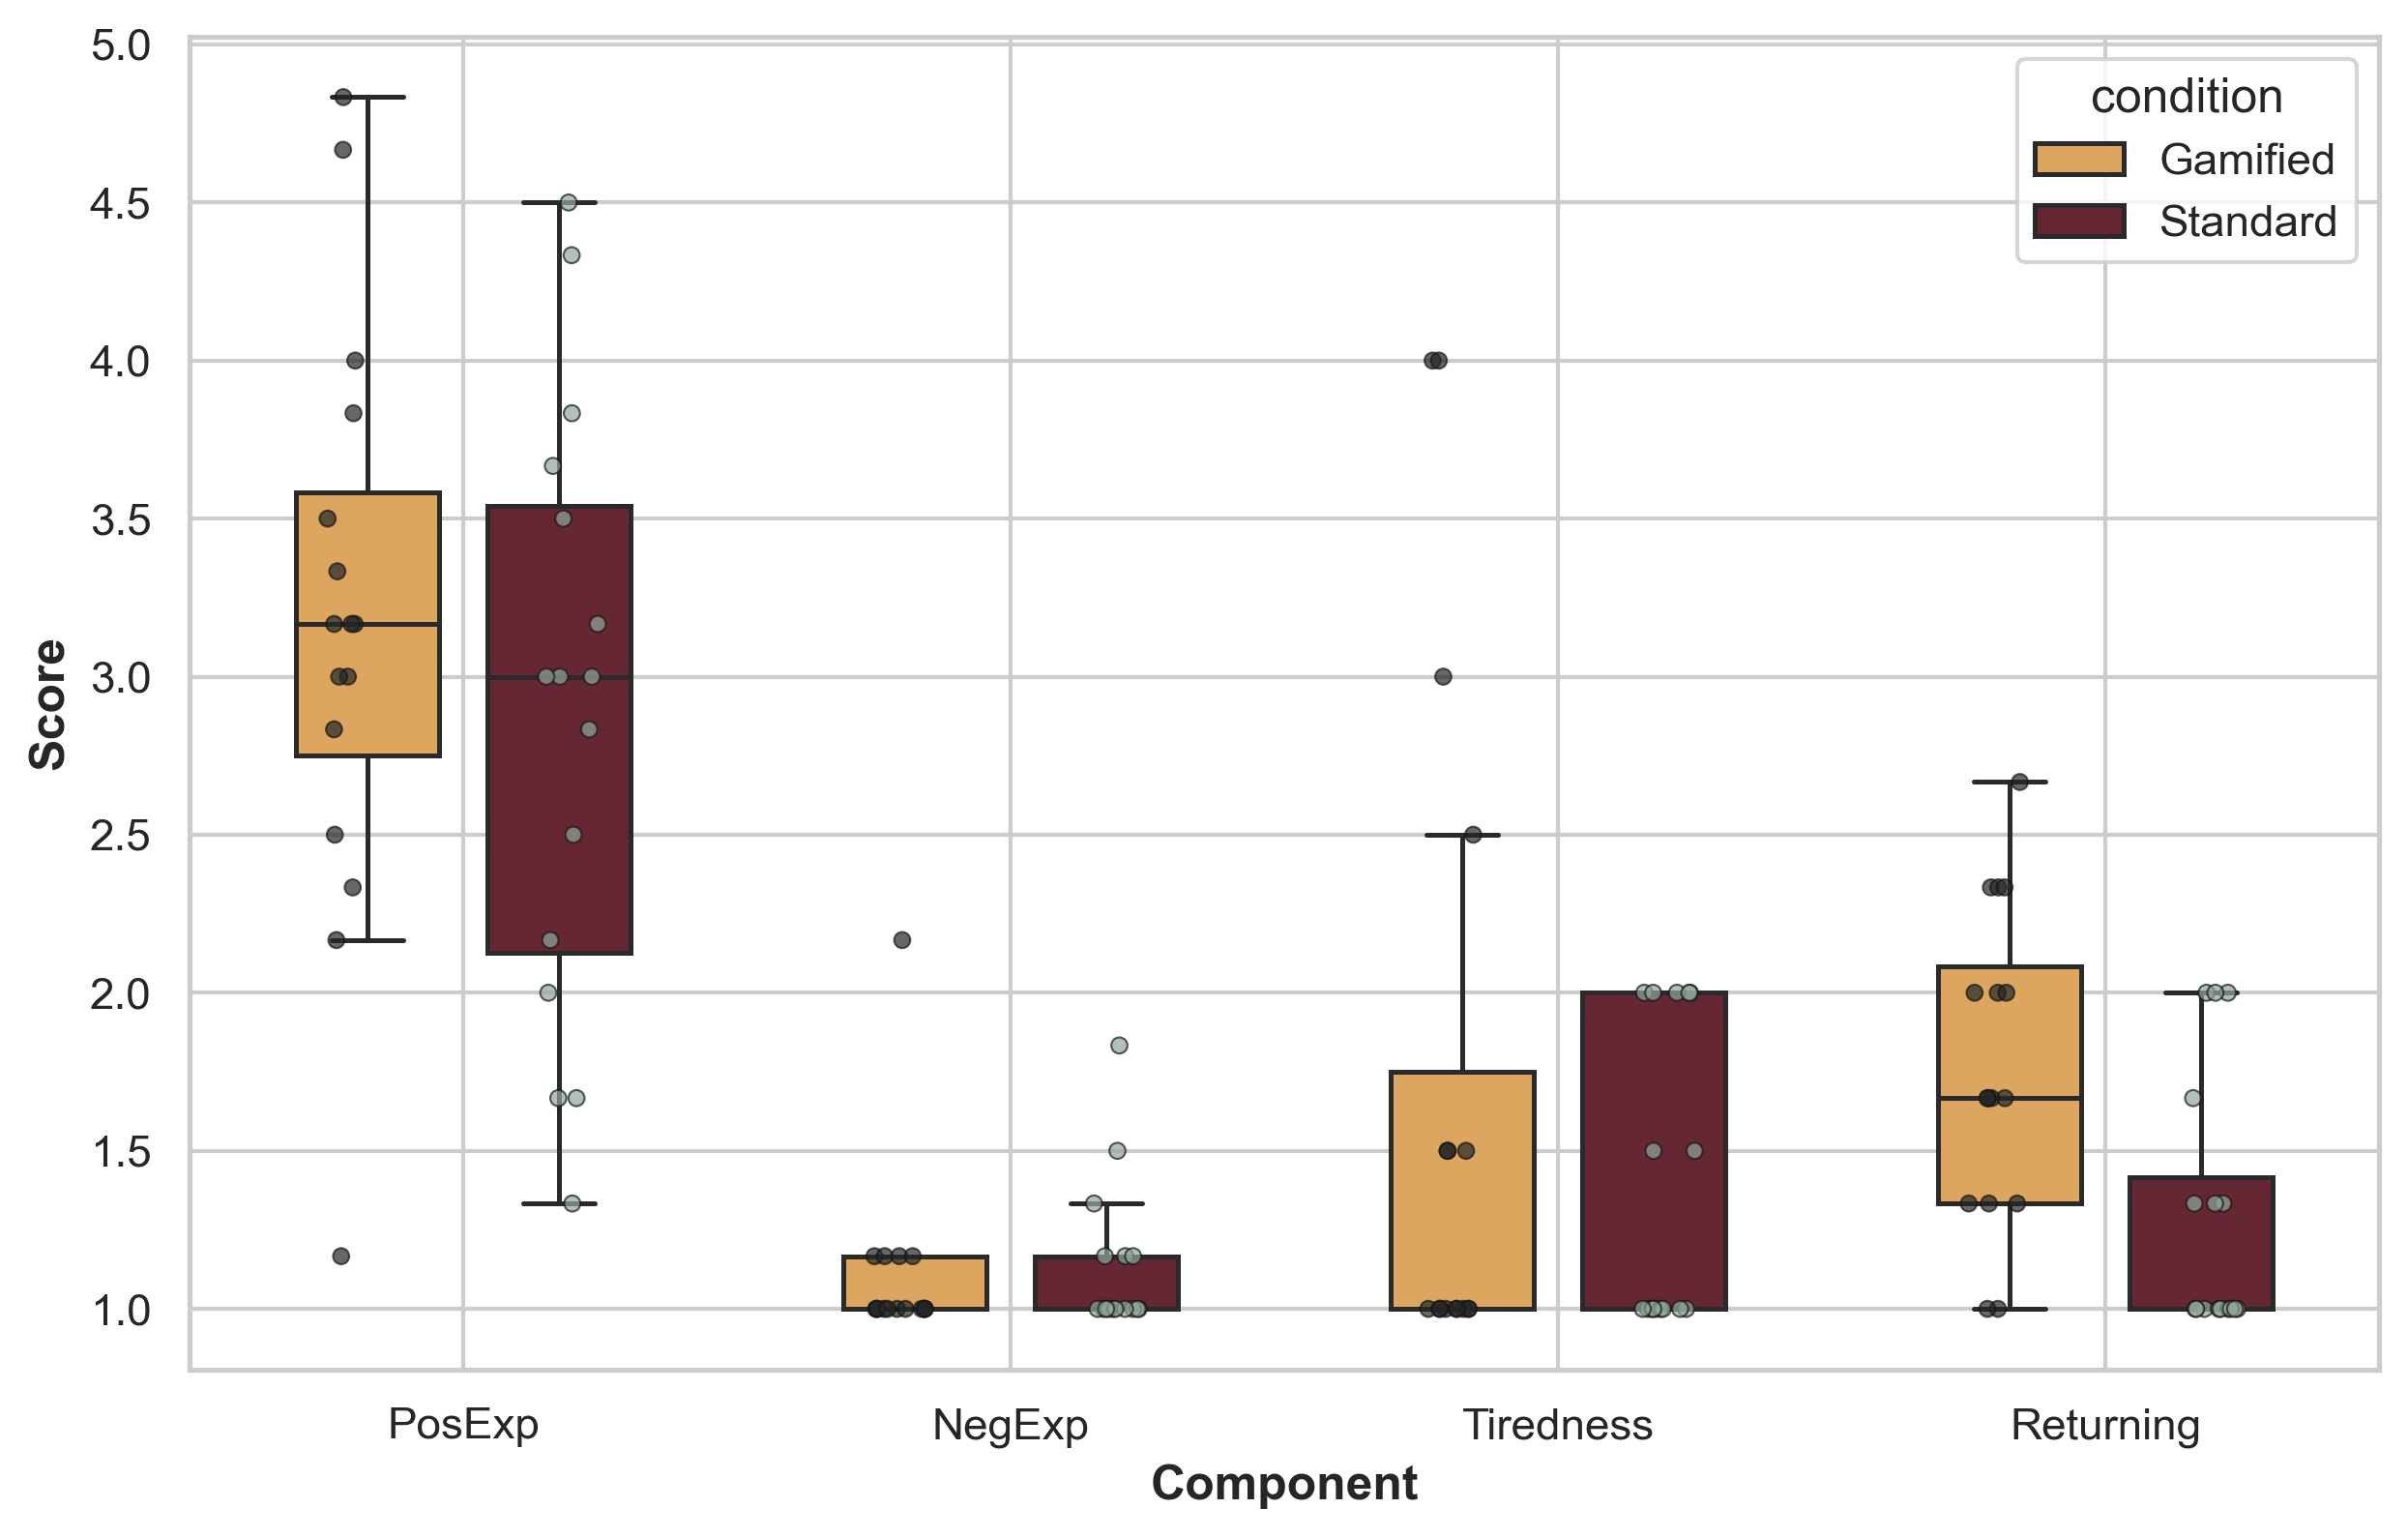

In [67]:

# Reshape the data for grouped plotting
melted_post_df = post_combined.melt(
    id_vars=["ID", "condition"],
    value_vars=['PosExp', 'NegExp', 'Tiredness', 'Returning'],
    var_name="Scale",
    value_name="Score"
)

# Map condition codes to labels
melted_post_df["condition"] = melted_post_df["condition"].map({"g": "Gamified", "s": "Standard"})



# Set theme
sns.set_theme(style="whitegrid")

# Define custom colors
palette = {
    "Gamified": "#F1A84C",  
    "Standard": "#6F1D2D"   
}

# Initialize the plot
plt.figure(figsize=(9, 6), dpi=300)

# Draw grouped boxplot
sns.boxplot(
    x='Scale',
    y='Score',
    hue='condition',
    data=melted_post_df,
    palette=palette,
    width=0.7,
    fliersize=0,
    linewidth=1.2, 
    gap=0.25
)

# Overlay individual datapoints
sns.stripplot(
    x='Scale',
    y='Score',
    hue='condition',
    data=melted_post_df,
    palette='dark:#91A79C',
    dodge=True,
    jitter=True,
    size=4,
    alpha=0.7,
    linewidth=0.5,
    legend=False
)


# Customize labels and layout
plt.rcParams.update({'font.size': 30})
#plt.title('Post-Game Module Answers', fontsize=18, fontweight='bold')
plt.xlabel('Component', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()




#### Calculate difference scores post-game module 

In [64]:
# pivot data so that "condition" becomes columns
pivoted = post_combined.pivot(index='ID', columns='condition')
#print(pivoted)

# subtract gamified - standard
diff_post = pivoted.xs('g', axis=1, level=1) - pivoted.xs('s', axis=1, level=1)

# reset index 
diff_post = diff_post.reset_index()
print(diff_post)


        ID    PosExp    NegExp  Tiredness  Returning
0   02JO85  0.333333  0.000000        0.0   0.333333
1   07az26  1.000000  0.000000        2.0   1.333333
2   08MA21  0.333333 -0.166667        1.0   1.000000
3   09HA13  0.333333  0.000000        0.0  -0.333333
4   10PE77  0.833333  0.000000       -1.0   0.666667
5   11LK66 -0.833333  0.166667        0.0   0.000000
6   15JO96  0.833333  0.000000        0.0   0.333333
7   17BE17  1.166667  0.000000        0.0   0.000000
8   17HE69  0.166667  0.333333        0.0   0.666667
9   19RA95  0.166667  0.000000        0.0   1.000000
10  21EL67 -0.666667  0.000000        0.5   1.000000
11  27JA04  0.500000  0.000000        0.0   0.666667
12  28CO38  1.000000  0.000000        0.0   0.333333
13  29MA29 -0.166667  0.000000        0.0  -0.333333
14   2BR68  0.000000 -0.333333        0.5   0.666667
15   2MA07 -0.500000 -0.333333        2.0   0.333333


### Look at distribution for all components' difference scores
- graphical using qq plot (+ histogram & box plot)
- analytical test of normality using Shapiro-Wilk

In [65]:
# drop ID column for this 
post = diff_post.iloc[:, 1:]

# Define customized colors
hist_color = "#91A79C"
box_color = "#F1A84C"
line_color = "#6F1D2D"
ci_color = "#F7D175"

# Loop over each column in your difference DataFrame
for col in post.columns:

    diff_values = post[col]

    
    # Shapiro-Wilk Test to check normality assumption 
    shapiro_stat, shapiro_p = shapiro(diff_values)
    print(f"Shapiro-Wilk Test:\nStatistic = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}")
    if shapiro_p > 0.05:
        print(f"Data for {col} appears to be normally distributed (H0 cannot be rejected)")
    else:
        print(f"Data for {col} does not appear to be normally distributed (reject H0)")


    mu, std = diff_values.mean(), diff_values.std()

    # 1. Histogram with normal distribution overlay
    plt.figure(figsize=(8, 6))
    sns.histplot(diff_values, kde=False, stat="density", bins=10, color=hist_color, edgecolor="black")
    x = np.linspace(diff_values.min(), diff_values.max(), 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, line_color, linewidth=2)
    plt.title(f"Histogram with Normal Distribution Overlay ({col})", fontsize=16, fontweight="bold")
    plt.xlabel(f"{col} Difference Score", fontweight="bold")
    plt.ylabel("Density", fontweight="bold")
    plt.tight_layout()
    
     # Save the figure
    save_path = os.path.join(output_folder, f"{col}_histogram.png")
    plt.savefig(save_path)

    plt.close()  # Close figure to free memory


    # 2. Q-Q Plot with 95% Confidence Interval
    plt.figure(figsize=(8, 6))
    sorted_data = np.sort(diff_values)
    n = len(sorted_data)
    theoretical_quants = stats.norm.ppf((np.arange(1, n + 1) - 0.5) / n, loc=mu, scale=std)

    # fit line
    slope, intercept, r_value, p_value, std_err = stats.linregress(theoretical_quants, sorted_data)
    fit_line = slope * theoretical_quants + intercept

    # Compute 95% CI bands
    se = (std / np.sqrt(n)) * 1.96
    lower_bound = fit_line - se
    upper_bound = fit_line + se

    plt.plot(theoretical_quants, sorted_data, 'o', label='Observed Quantiles', color=line_color)
    plt.plot(theoretical_quants, fit_line, 'black', label='Fit Line', linewidth=2)
    plt.fill_between(theoretical_quants, lower_bound, upper_bound, color=ci_color, alpha=0.3, label='95% CI')
    plt.title(f"Q-Q Plot with 95% Confidence Interval ({col})", fontsize=16, fontweight="bold")
    plt.xlabel("Theoretical Quantiles", fontweight="bold")
    plt.ylabel("Observed Quantiles", fontweight="bold")
    plt.legend()
    plt.tight_layout()

     # Save the figure
    save_path = os.path.join(output_folder, f"{col}_qq.png")
    plt.savefig(save_path)

    plt.close()  # Close figure to free memory


    # 3. Boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=diff_values, color=box_color)
    # Overlay individual datapoints (stripplot)
    sns.stripplot(x=diff_values, color=line_color, size=6, jitter=True, alpha=0.8)
    plt.title(f"Boxplot of {col} Difference Score", fontsize=16, fontweight="bold")
    plt.xlabel(f"{col} Difference Score", fontweight="bold")
    plt.tight_layout()

    # Save the figure
    save_path = os.path.join(output_folder, f"{col}_boxplot.png")
    plt.savefig(save_path)

    plt.close()  # Close figure to free memory


Shapiro-Wilk Test:
Statistic = 0.9511, p-value = 0.5077
Data for PosExp appears to be normally distributed (H0 cannot be rejected)
Shapiro-Wilk Test:
Statistic = 0.7739, p-value = 0.0013
Data for NegExp does not appear to be normally distributed (reject H0)
Shapiro-Wilk Test:
Statistic = 0.7543, p-value = 0.0007
Data for Tiredness does not appear to be normally distributed (reject H0)
Shapiro-Wilk Test:
Statistic = 0.9493, p-value = 0.4791
Data for Returning appears to be normally distributed (H0 cannot be rejected)


### Merge core and post difference scores to get whole experience csv 

This will be used in the R script for running the Bayesian hypothesis tests

In [66]:
post = pd.read_csv('post_combined.csv')
core = pd.read_csv('core_combined.csv')

df_experience = core.merge(post, on=['ID', 'condition'], how='outer')
print(df_experience)
df_experience.to_csv('full_experience.csv', index=False)

        ID condition  Competence  Immersion  Flow   Tension  Challenge  \
0   02JO85         g         5.0   3.000000   4.2  1.000000        1.8   
1   02JO85         s         5.0   2.333333   3.4  1.000000        1.8   
2   07az26         g         4.4   4.666667   3.8  1.000000        3.2   
3   07az26         s         4.4   2.166667   2.6  2.333333        1.8   
4   08MA21         g         4.2   3.500000   3.2  1.666667        3.0   
5   08MA21         s         4.2   2.666667   4.2  1.000000        2.4   
6   09HA13         g         5.0   4.666667   5.0  1.000000        2.2   
7   09HA13         s         5.0   3.666667   4.6  1.000000        1.0   
8   10PE77         g         4.4   3.166667   3.8  1.000000        1.2   
9   10PE77         s         4.0   3.000000   3.6  1.000000        2.0   
10  11LK66         g         3.8   1.166667   2.6  1.000000        1.0   
11  11LK66         s         4.4   1.333333   2.8  1.000000        1.0   
12  15JO96         g         3.6   3.0